
A. Prediction and Analysis
  1. Sort data on a daily basis
  2. Sort data on a monthly basis
  3. Visualization of Daily Sunspot Number
  4. Visualization of Monthly Sunspot Number
  5. Removing NAN data
  6. Creating range for x and y value of data
  7. Using random seed and MinMaxScaler function transform and reshape your created x and y data for plotting
  8. Split into train and test sets
  9. Reshape input to be [samples, time steps, features]
  10. Prediction Plot
  11. Shift train predictions for plotting, test predictions for plotting, plot baseline and predictions

  
  CSV File: [Sunspots](https://drive.google.com/file/d/1GMMN8lyDKMh8T4gtfzpgadrxxybnmQJU/view?usp=sharing)

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/SIDC-SUNSPOTS_D (2).csv", parse_dates=['Date'])

# Sort by date
df.sort_values(by='Date', inplace=True)

# Daily basis
daily_df = df.copy()

# Monthly average
monthly_df = df.resample('M', on='Date').mean()


/tmp/ipython-input-1-2690089349.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M', on='Date').mean()


In [ ]:
# Daily basis
daily_df = df.copy()
daily_df

,Date,Daily Sunspot Number,Standard Deviation,Number of Observations,Definitive/Provisional Indicator
69648,1818-01-08,65.0,10.2,1.0,1.0
69647,1818-01-13,37.0,7.7,1.0,1.0
69646,1818-01-17,77.0,11.1,1.0,1.0
69645,1818-01-18,98.0,12.6,1.0,1.0
69644,1818-01-19,105.0,13.0,1.0,1.0
...,...,...,...,...,...
4,2017-07-27,0.0,0.0,33.0,0.0
3,2017-07-28,11.0,1.5,17.0,0.0
2,2017-07-29,16.0,7.7,11.0,0.0
1,2017-07-30,15.0,5.0,33.0,0.0


/tmp/ipython-input-16-279518365.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M', on='Date').mean()


            Monthly Sunspot Number  Standard Deviation  \
Date                                                     
1818-01-31               58.125000            9.300000   
1818-02-28               37.428571            6.242857   
1818-03-31               42.357143            7.792857   
1818-04-30               57.523810            9.452381   
1818-05-31               88.480000           11.532000   
...                            ...                 ...   
2017-03-31               17.677419            1.541935   
2017-04-30               32.633333            2.503333   
2017-05-31               18.806452            1.567742   
2017-06-30               19.400000            1.183333   
2017-07-31               18.258065            2.022581   

            Number of Observations  Definitive/Provisional Indicator  
Date                                                                  
1818-01-31                1.000000                               1.0  
1818-02-28                1.0000

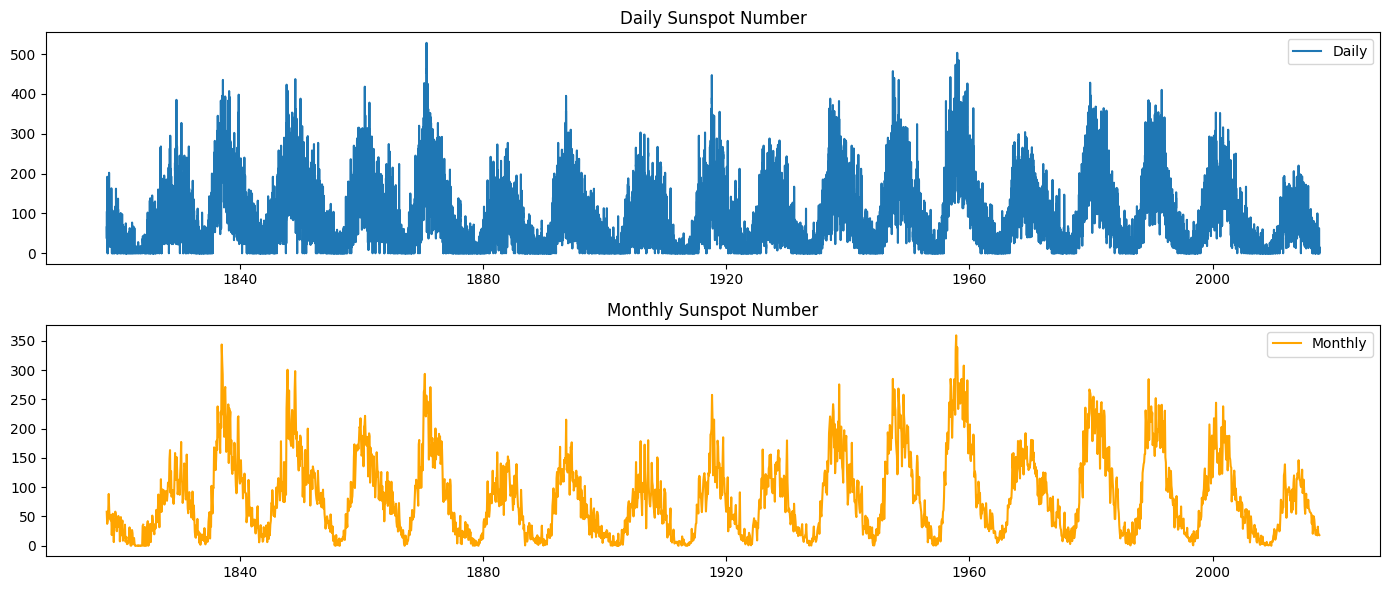

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
plt.plot(daily_df['Date'], daily_df['Daily Sunspot Number'], label='Daily')
plt.title("Daily Sunspot Number")
plt.legend()

# Papalitan Daily Sunspot Number into Monthly to avoid confusion
df = pd.read_csv("/content/SIDC-SUNSPOTS_D.csv", parse_dates=['Date'])
df['Date'] = pd.to_datetime(df['Date'])
monthly_df = df.resample('M', on='Date').mean()
monthly_df.rename(columns={'Daily Sunspot Number': 'Monthly Sunspot Number'}, inplace=True)
print(monthly_df) #Debugging purposes in case


plt.subplot(2,1,2)
plt.plot(monthly_df.index, monthly_df['Monthly Sunspot Number'], label='Monthly', color='orange')
plt.title("Monthly Sunspot Number")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
daily_df.dropna(inplace=True)
monthly_df.dropna(inplace=True)


In [ ]:
import numpy as np

sunspots = monthly_df['Daily Sunspot Number'].values

def create_sequences(data, seq_length=12):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

x, y = create_sequences(sunspots)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Reshape
x_scaled = x_scaled.reshape((x_scaled.shape[0], 12, 1))  # [samples, time_steps, features]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=False)


Pwede ibahin structure nito (yung adam and mse)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(12, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=30, batch_size=16, validation_data=(x_test, y_test))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0281 - val_loss: 0.0073
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - val_loss: 0.0064
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 9/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 10/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 11/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 12/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

# Inverse transform predictions
train_pred_inv = scaler.inverse_transform(train_pred)
test_pred_inv = scaler.inverse_transform(test_pred)
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


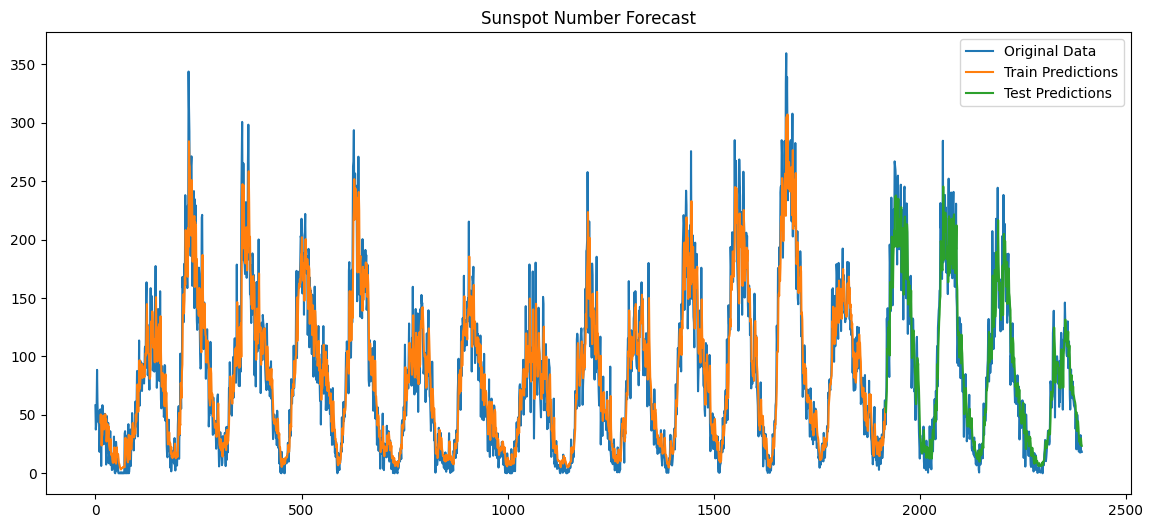

In [ ]:
train_plot = np.empty_like(sunspots)
train_plot[:] = np.nan
train_plot[12:12+len(train_pred)] = train_pred_inv.flatten()

test_plot = np.empty_like(sunspots)
test_plot[:] = np.nan
test_plot[12+len(train_pred):] = test_pred_inv.flatten()

# Plot
plt.figure(figsize=(14,6))
plt.plot(sunspots, label='Original Data')
plt.plot(train_plot, label='Train Predictions')
plt.plot(test_plot, label='Test Predictions')
plt.title('Sunspot Number Forecast')
plt.legend()
plt.show()
